## Importing Datasets

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression


In [43]:
# Reading Data Set 
tracks = pd.read_csv('tracks.csv')
genre = pd.read_csv('SpotifyFeatures.csv')

In [44]:
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],22-02-1922,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],01-06-1922,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],21-03-1922,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],21-03-1922,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [45]:
genre.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,04-Apr,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,04-Apr,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,05-Apr,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,04-Apr,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,04-Apr,0.390


## Spotify Tracks Dataset Analysis

In [46]:
# checking null values
pd.isnull(tracks).sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [47]:
tracks.drop(['id_artists','id'],axis=1,inplace=True)

In [48]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10124 entries, 0 to 10123
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              10124 non-null  object 
 1   popularity        10124 non-null  int64  
 2   duration_ms       10124 non-null  int64  
 3   explicit          10124 non-null  int64  
 4   artists           10124 non-null  object 
 5   release_date      10124 non-null  object 
 6   danceability      10124 non-null  float64
 7   energy            10124 non-null  float64
 8   key               10124 non-null  int64  
 9   loudness          10124 non-null  float64
 10  mode              10124 non-null  int64  
 11  speechiness       10124 non-null  float64
 12  acousticness      10124 non-null  float64
 13  instrumentalness  10124 non-null  float64
 14  liveness          10124 non-null  float64
 15  valence           10124 non-null  float64
 16  tempo             10124 non-null  float6

### Descriptive statistics of Spotify tracks

In [49]:
tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,10124.0,1.837515,5.132462,0.0,0.00000,0.00000,1.0000,65.000
duration_ms,10124.0,188470.533880,97816.817793,3344.0,151289.75000,177682.50000,194766.7500,3093226.000
explicit,10124.0,0.003161,0.056135,0.0,0.00000,0.00000,0.0000,1.000
danceability,10124.0,0.586751,0.163274,0.0,0.47700,0.62800,0.7100,0.956
energy,10124.0,0.264942,0.151171,0.0,0.16500,0.24100,0.3270,1.000
key,10124.0,4.925425,3.469981,0.0,2.00000,5.00000,8.0000,11.000
loudness,10124.0,-15.375379,5.402282,-60.0,-19.34725,-14.98500,-11.4750,0.674
mode,10124.0,0.719577,0.449228,0.0,0.00000,1.00000,1.0000,1.000
speechiness,10124.0,0.284414,0.365153,0.0,0.04620,0.07560,0.3530,0.969
acousticness,10124.0,0.872825,0.196640,0.0,0.84000,0.96900,0.9920,0.996


### Top 10 most popular songs on Spotify

In [50]:
most = tracks.query('popularity > 90', inplace = False).sort_values('popularity', ascending = False)
most[:10]

,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature


### Top 10 least popular songs on Spotify

In [51]:
least = tracks.sort_values('popularity', ascending = True).head(10)
least

,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
5061,Rostro Palido - Instrumental (Remasterizado),0,164533,0,['Francisco Canaro'],18-10-1929,0.729,0.1800,4,-13.543,0,0.0867,0.995,0.5960,0.161,0.776,120.215,4
6058,Tres Aires Bolivianos,0,211435,0,['Banda Española'],01-01-1930,0.602,0.4300,0,-12.015,0,0.0972,0.996,0.8240,0.434,0.671,82.546,3
6056,Polle Nihtes Perpatisa,0,189027,0,['Dimiris Holevas'],01-01-1930,0.443,0.6550,8,-5.820,0,0.0402,0.966,0.9140,0.168,0.553,125.637,3
6055,As Pan Na Doun Ta Matia Mou,0,190053,0,['Dimitris Mpenetos'],01-01-1930,0.481,0.4190,8,-10.022,0,0.0503,0.996,0.1990,0.342,0.846,125.581,4
6053,L'dovid mizmor,0,233013,0,['Z.Kwartin'],1930,0.261,0.0889,10,-17.633,0,0.0347,0.991,0.5000,0.126,0.191,140.977,4
6052,Whip Me With Plenty Of Love,0,189378,0,['Clarence Williams & His Washboard Band'],23-04-1930,0.832,0.5910,7,-9.314,1,0.1730,0.991,0.8540,0.221,0.890,112.360,4
6051,Me thamponoun oi maties sou,0,155453,0,['Dimitris Pedikopoulos'],01-01-1930,0.598,0.6430,10,-9.375,1,0.0452,0.995,0.9320,0.122,0.963,88.479,4
6050,Stis Livadias Ton Kafene,0,182907,0,['Dimitris Holevas'],01-01-1930,0.527,0.3200,6,-9.745,0,0.0514,0.993,0.0324,0.239,0.802,126.635,3
6049,Patrinia,0,192747,0,['Roza Eskenazi'],01-01-1930,0.373,0.6040,1,-6.192,1,0.0435,0.926,0.2860,0.142,0.672,112.263,4
6048,Capítulo 21.2 - el Que Susurraba en la Oscuridad,0,127500,0,['H.P. Lovecraft'],1930,0.635,0.4380,9,-16.186,1,0.9570,0.809,0.0000,0.178,0.695,84.071,4


### Changing index to release date

In [52]:
tracks.set_index('release_date', inplace = True)
tracks.index=pd.to_datetime(tracks.index)
tracks.head()

c:\Users\Boudhik Shaj\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\tools\datetimes.py:1056: UserWarning: Parsing '22-02-1922' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Boudhik Shaj\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\tools\datetimes.py:1056: UserWarning: Parsing '21-03-1922' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Boudhik Shaj\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\tools\datetimes.py:1056: UserWarning: Parsing '29-03-1922' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Boudhik Shaj\AppData\Local\Programs\Python\

,name,popularity,duration_ms,explicit,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
release_date,,,,,,,,,,,,,,,,,
1922-02-22,Carve,6,126903,0,['Uli'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1922-01-06,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
1922-03-21,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
1922-03-21,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
1922-01-01,Lady of the Evening,0,163080,0,['Dick Haymes'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


### Check artist at 18th row of Spotify Tracks Dataset

In [53]:
tracks[['artists']].iloc[18]

artists    ['Victor Boucher']
Name: 1922-01-01 00:00:00, dtype: object

### Converting duration from millisecond to second on Spotify Tracks Dataset

In [54]:
tracks['duration'] = tracks['duration_ms'].apply (lambda x : round(x/1000))
tracks.drop('duration_ms', inplace = True, axis=1)
tracks.duration.head()

release_date
1922-02-22    127
1922-01-06     98
1922-03-21    182
1922-03-21    177
1922-01-01    163
Name: duration, dtype: int64

### Correlation Heatmap between Variable using Pearson correlation method

[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'danceability'),
 Text(2.5, 0, 'energy'),
 Text(3.5, 0, 'loudness'),
 Text(4.5, 0, 'speechiness'),
 Text(5.5, 0, 'acousticness'),
 Text(6.5, 0, 'instrumentalness'),
 Text(7.5, 0, 'liveness'),
 Text(8.5, 0, 'valence'),
 Text(9.5, 0, 'tempo'),
 Text(10.5, 0, 'time_signature'),
 Text(11.5, 0, 'duration')]

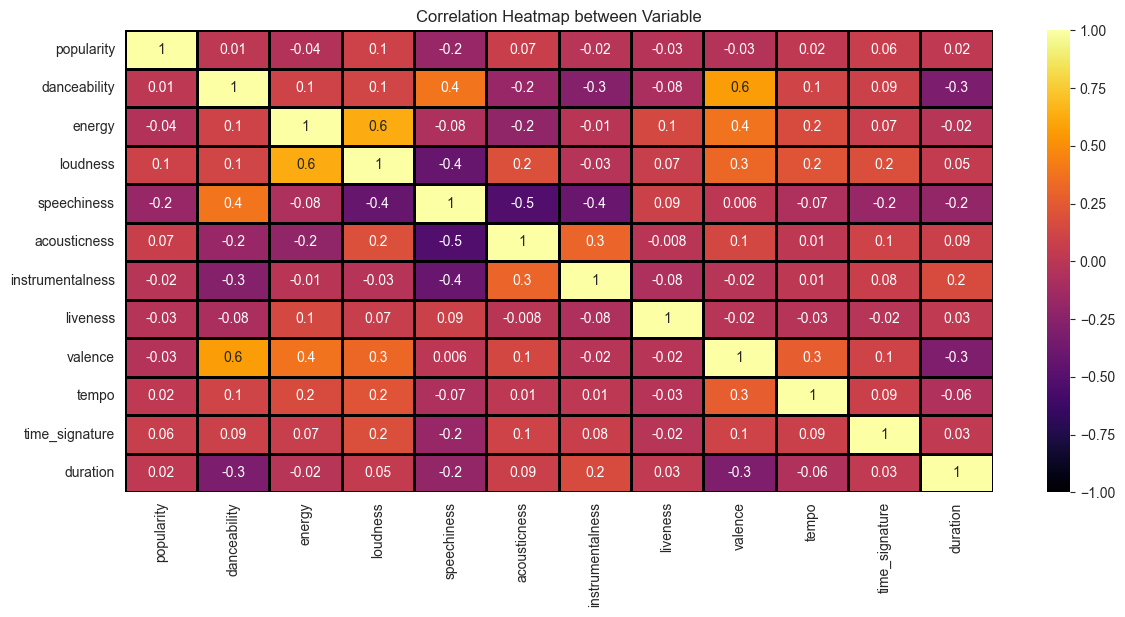

In [55]:
cm = tracks.drop(['key','mode','explicit'], axis=1).corr(method = 'pearson')
plt.figure(figsize=(14,6))
map = sns.heatmap(cm, annot = True, fmt = '.1g', vmin=-1, vmax=1, center=0, cmap='inferno', linewidths=1, linecolor='Black')
map.set_title('Correlation Heatmap between Variable')
map.set_xticklabels(map.get_xticklabels(), rotation=90)

### Considering 0.4% of the total dataset to create Regression plots

In [56]:
sam = tracks.sample(int(0.004 * len(tracks)))
len(sam)

40

### Regression plot - Correlation between Loudness and Energy

[Text(0.5, 1.0, 'Loudness vs Energy Correlation')]

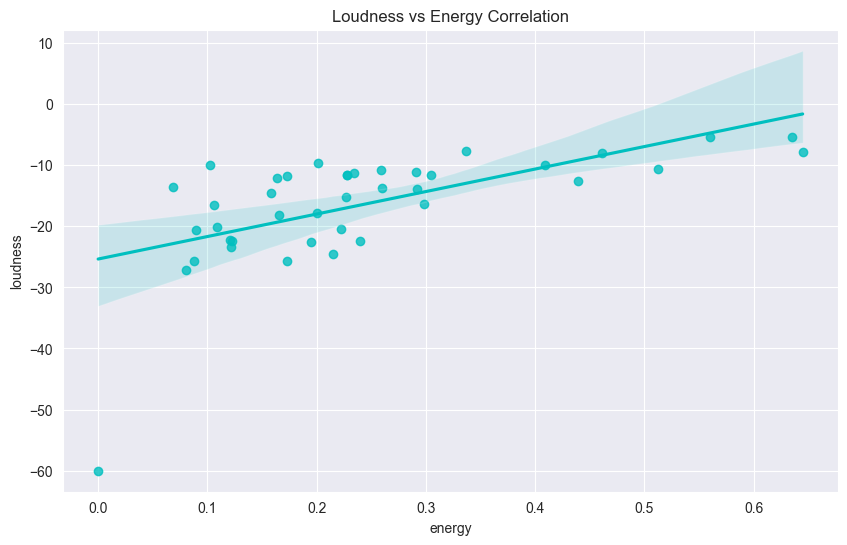

In [57]:
plt.figure(figsize=(10,6))
sns.regplot(data=sam, y='loudness', x='energy', color='c').set(title='Loudness vs Energy Correlation')

### Regression plot - Correlation between Popularity and Acousticness

[Text(0.5, 1.0, 'Popularity vs Acousticness Correlation')]

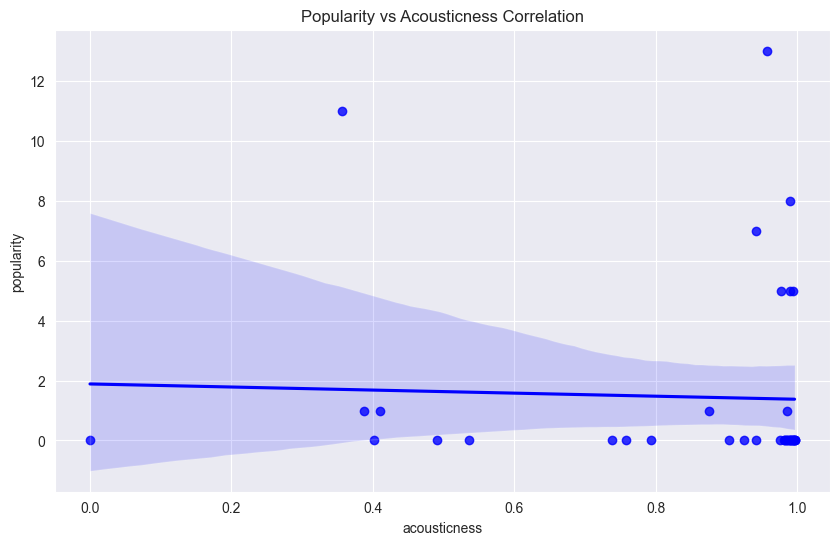

In [58]:
plt.figure(figsize=(10,6))
sns.regplot(data=sam, y='popularity', x='acousticness', color='b').set(title='Popularity vs Acousticness Correlation')

### Creating new column in tracks dataset (Year, Release Date)

In [59]:
tracks['dates']=tracks.index.get_level_values('release_date')
tracks.dates=pd.to_datetime(tracks.dates)
years=tracks.dates.dt.year

In [60]:
tracks.head()

,name,popularity,explicit,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration,dates
release_date,,,,,,,,,,,,,,,,,,
1922-02-22,Carve,6,0,['Uli'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,127,1922-02-22
1922-01-06,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,98,1922-01-06
1922-03-21,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,182,1922-03-21
1922-03-21,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,177,1922-03-21
1922-01-01,Lady of the Evening,0,0,['Dick Haymes'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,163,1922-01-01


### Distibution plot - Visualize total number of songs on Spotify since 1992

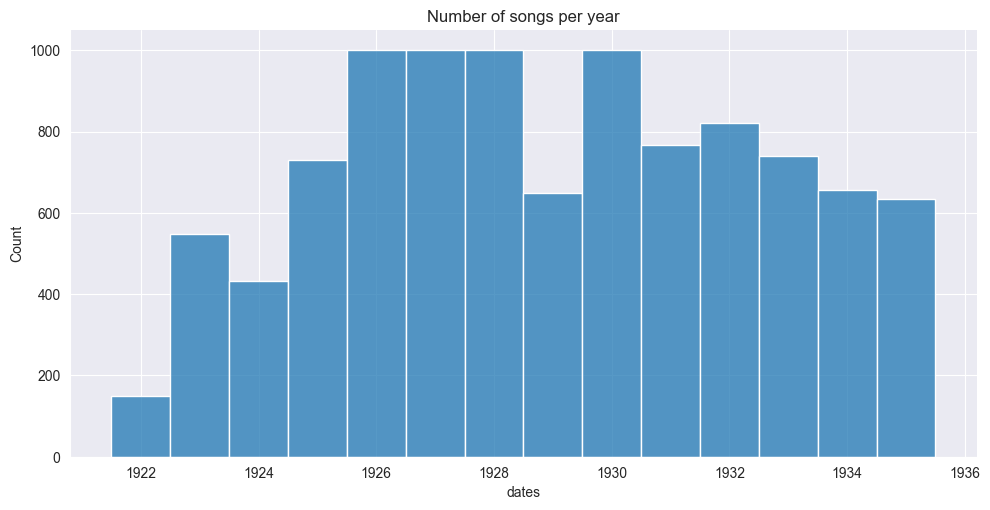

In [61]:
sns.displot(years, discrete=True, aspect=2, height=5, kind='hist').set(title='Number of songs per year')

### Change in Duration of songs wrt Years

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '1922'),
  Text(1, 0, '1923'),
  Text(2, 0, '1924'),
  Text(3, 0, '1925'),
  Text(4, 0, '1926'),
  Text(5, 0, '1927'),
  Text(6, 0, '1928'),
  Text(7, 0, '1929'),
  Text(8, 0, '1930'),
  Text(9, 0, '1931'),
  Text(10, 0, '1932'),
  Text(11, 0, '1933'),
  Text(12, 0, '1934'),
  Text(13, 0, '1935')])

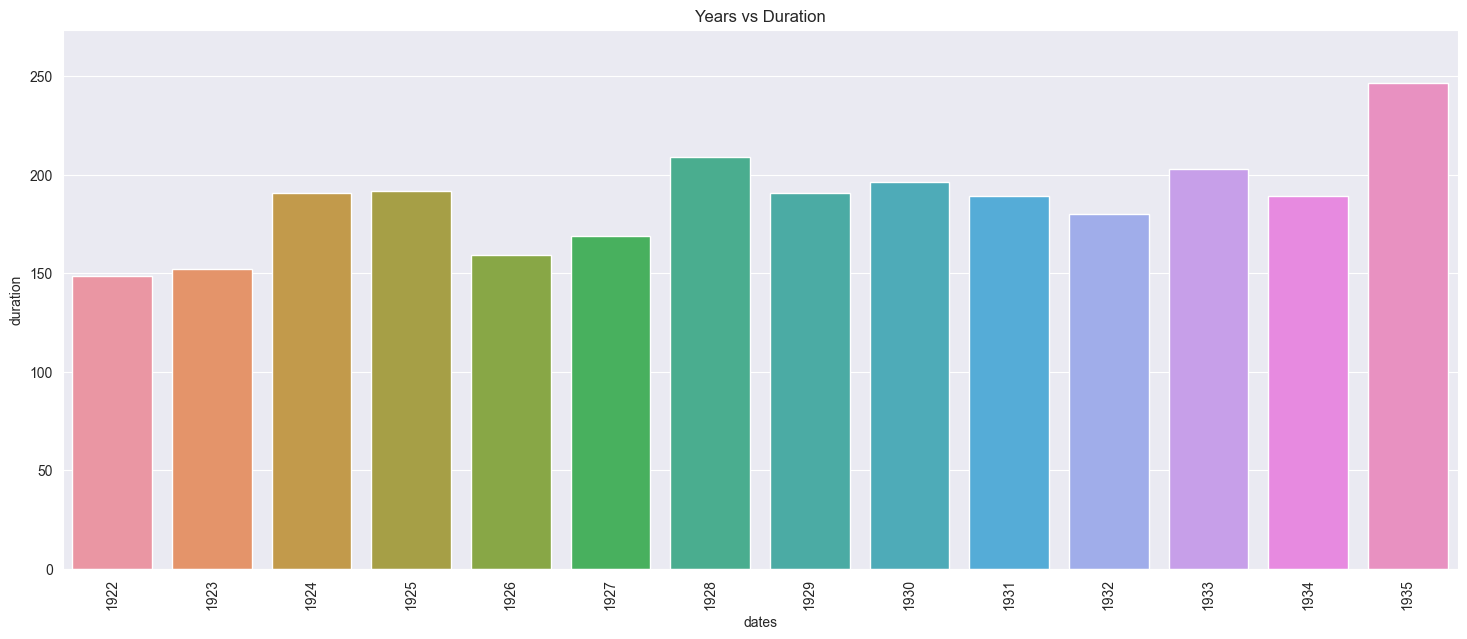

In [62]:
total_dr = tracks.duration
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)
fig = sns.barplot(x = years, y = total_dr, ax = ax, errwidth = False).set(title='Years vs Duration')
plt.xticks(rotation=90)

## Spotify Features Dataset Analysis

### Duration of songs in different Genres

Text(0, 0.5, 'Genres')

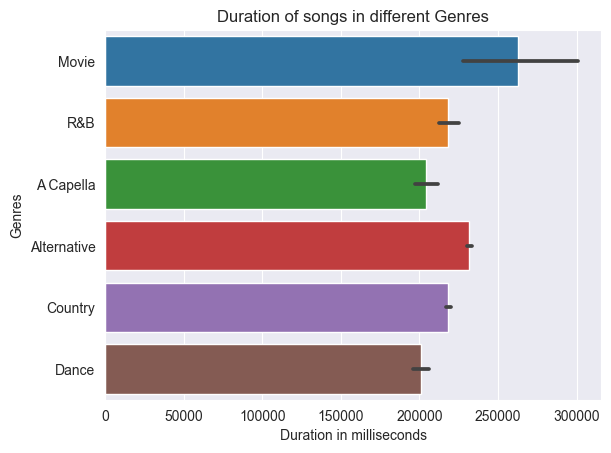

In [63]:
plt.title('Duration of songs in different Genres')
sns.color_palette('rocket', as_cmap=True)
sns.barplot(y='genre', x='duration_ms', data=genre)
plt.xlabel('Duration in milliseconds')
plt.ylabel('Genres')

### Top 5 Genres by Popularity

[Text(0.5, 1.0, 'Top 5 Genres by Popularity')]

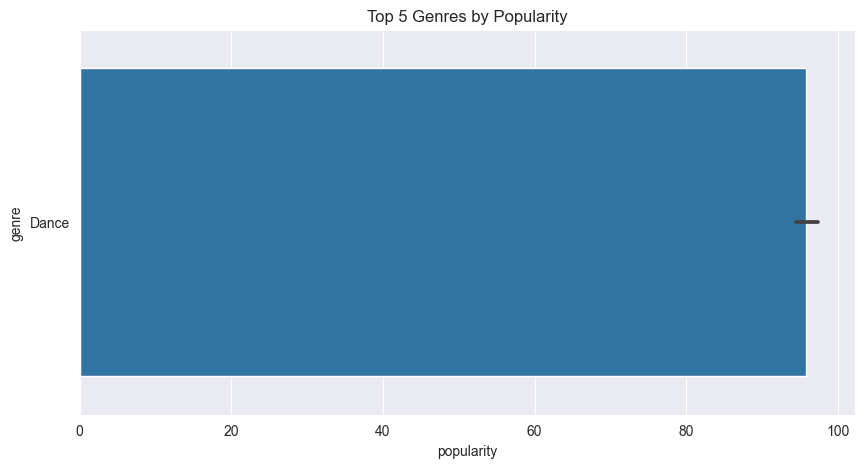

In [64]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(10,5))
popular = genre.sort_values('popularity', ascending=False).head(10)
sns.barplot(y = 'genre', x = 'popularity', data = popular).set(title='Top 5 Genres by Popularity')

In [65]:
tracks.head()

,name,popularity,explicit,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration,dates
release_date,,,,,,,,,,,,,,,,,,
1922-02-22,Carve,6,0,['Uli'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,127,1922-02-22
1922-01-06,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,98,1922-01-06
1922-03-21,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,182,1922-03-21
1922-03-21,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,177,1922-03-21
1922-01-01,Lady of the Evening,0,0,['Dick Haymes'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,163,1922-01-01


In [66]:
X = tracks.drop(['danceability','mode','name','artists','dates','duration'],axis=1)
Y = tracks['mode']
X.reset_index(drop=True, inplace=True)
Y.reset_index(drop=True, inplace=True)

In [67]:
cols=['energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature']

In [68]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X[cols]=st.fit_transform(X[cols])

In [69]:
X.head()


,popularity,explicit,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,6,0,1.191149,0,0.377152,0.456233,-1.011163,1.251363,-0.399439,-1.951809,-0.209663,-1.078842
1,0,0,-0.012844,0,-1.251500,1.842023,-0.385623,-0.745067,-0.419465,0.294639,-0.301066,-3.943679
2,0,0,-0.581764,1,-1.074529,-0.638706,0.616256,-0.686570,0.007762,-0.547779,0.612610,1.785996
3,0,0,-1.126869,7,-2.329801,-0.640897,0.621342,1.718270,-0.713183,-0.803057,1.884983,-1.078842
4,0,0,-0.707456,3,-0.282232,-0.672118,0.590828,-0.396229,0.668627,-1.658239,-0.262118,0.353577


### Logistic Regression

In [70]:
model = LogisticRegression()
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=3)
model.fit(X_train,y_train)
#passing the predict method your test data. This will return predicted values of y given the new test X data.
y_pred=model.predict(X_test) 
s_pred = model.predict(X_train)

Log_Train = round(model.score(X_train, y_train) * 100,2)
Log_Test = round(model.score(X_test, y_test) * 100,2)

print("Training Accuracy : {}%".format(Log_Train))
print("Testing Accuracy  : {}%".format(Log_Test))
    


#  prediction Summary by species
print(classification_report(y_test, y_pred))

Training Accuracy : 72.28%
Testing Accuracy  : 71.36%
              precision    recall  f1-score   support

           0       0.45      0.03      0.05       865
           1       0.72      0.99      0.83      2173

    accuracy                           0.71      3038
   macro avg       0.59      0.51      0.44      3038
weighted avg       0.64      0.71      0.61      3038

